# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uninstall Libraries
# %pip uninstall -y numpy pandas matplotlib seaborn fastparquet pyarrow geopandas

In [3]:
# Import the libraries you will be using for analysis

%pip install --upgrade "numpy==1.26.4" "pandas==2.2.2" "matplotlib==3.10.0" "seaborn==0.13.2" pyarrow fastparquet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

import pandas as pd

df = pd.read_parquet('/Users/akash.kumar/Downloads/Learner/Datasets and Dictionary/trip_records/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [7]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data


import os

# Select the folder having data files
os.chdir('/Users/akash.kumar/Downloads/Learner/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()
print(file_list)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        
        print(f"Processing {file_name} ...")
        
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # Ensure that the 'tpep_pickup_datetime' is in datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['pickup_date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['pickup_hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['pickup_date'].unique():
            
            # Iterate through each hour of the selected date    
            for hour in range(24):
                hour_data = monthly_data[(monthly_data['pickup_date'] == date) & (monthly_data['pickup_hour'] == hour)]
                
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

['2023-12.parquet', '2023-6.parquet', '2023-7.parquet', '2023-5.parquet', '2023-11.parquet', '2023-10.parquet', '2023-4.parquet', '2023-1.parquet', '2023-8.parquet', '2023-9.parquet', '2023-2.parquet', '2023-3.parquet']
Processing 2023-12.parquet ...
Processing 2023-6.parquet ...
Processing 2023-7.parquet ...
Processing 2023-5.parquet ...
Processing 2023-11.parquet ...
Processing 2023-10.parquet ...
Processing 2023-4.parquet ...
Processing 2023-1.parquet ...
Processing 2023-8.parquet ...
Processing 2023-9.parquet ...
Processing 2023-2.parquet ...
Processing 2023-3.parquet ...


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
df.to_parquet("Final_NYC_Taxi_2023_Sampled.parquet", index=False)
df.to_csv("Final_NYC_Taxi_2023_Sampled.csv", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
df = pd.read_parquet("Final_NYC_Taxi_2023_Sampled.parquet")

In [12]:
df.shape

(1896400, 22)

In [13]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,...,0.5,5.66,0.0,1.0,33.96,2.5,0.0,2023-12-01,0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,...,0.5,3.00,0.0,1.0,29.43,NaN,NaN,2023-12-01,0,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,...,0.5,3.14,0.0,1.0,18.84,2.5,0.0,2023-12-01,0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,...,0.5,0.00,0.0,1.0,21.22,NaN,NaN,2023-12-01,0,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,...,0.5,0.00,0.0,1.0,10.10,2.5,0.0,2023-12-01,0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)

df = df.drop(['pickup_date', 'pickup_hour'], axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [16]:
# Combine the two airport fee columns
print(df["Airport_fee"])
print(df["airport_fee"])

df["airport_fee"] = df["airport_fee"].fillna(0) + df["Airport_fee"].fillna(0)

# Drop the duplicate column
df = df.drop(columns=["Airport_fee"])

print(df["airport_fee"])


0          0.0
1          NaN
2          0.0
3          NaN
4          0.0
          ... 
1896395    0.0
1896396    0.0
1896397    0.0
1896398    0.0
1896399    0.0
Name: Airport_fee, Length: 1896400, dtype: float64
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1896395   NaN
1896396   NaN
1896397   NaN
1896398   NaN
1896399   NaN
Name: airport_fee, Length: 1896400, dtype: float64
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1896395    0.0
1896396    0.0
1896397    0.0
1896398    0.0
1896399    0.0
Name: airport_fee, Length: 1896400, dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
negative_fares = df[df["fare_amount"] < 0]
print("Rows with negative fare_amount:", negative_fares.shape[0])


Rows with negative fare_amount: 0


Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts
print("RatecodeID distribution for negative fares:")
print(negative_fares["RatecodeID"].value_counts())


RatecodeID distribution for negative fares:
Series([], Name: count, dtype: int64)


In [20]:
# Find which columns have negative values

# List of monetary columns
monetary_cols = [
    "fare_amount", "extra", "mta_tax", "tip_amount", 
    "tolls_amount", "improvement_surcharge", 
    "total_amount", "congestion_surcharge", "airport_fee"
]

for col in monetary_cols:
    neg_count = (df[col] < 0).sum()
    print(f"Negative values in {col}: {neg_count}")


Negative values in fare_amount: 0
Negative values in extra: 3
Negative values in mta_tax: 73
Negative values in tip_amount: 0
Negative values in tolls_amount: 0
Negative values in improvement_surcharge: 78
Negative values in total_amount: 78
Negative values in congestion_surcharge: 56
Negative values in airport_fee: 15


In [21]:
# fix these negative values

for col in monetary_cols:
    df[col] = df[col].clip(lower=0)

print("Negative values fixed.")

for col in monetary_cols:
    neg_count = (df[col] < 0).sum()
    print(f"Negative values in {col}: {neg_count}")
    


Negative values fixed.
Negative values in fare_amount: 0
Negative values in extra: 0
Negative values in mta_tax: 0
Negative values in tip_amount: 0
Negative values in tolls_amount: 0
Negative values in improvement_surcharge: 0
Negative values in total_amount: 0
Negative values in congestion_surcharge: 0
Negative values in airport_fee: 0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column
missing_proportion = df.isna().mean() * 100
print(missing_proportion)


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
store_and_fwd_flag       3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
airport_fee              0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
df[df['passenger_count'].isna()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,22.43,0.00,0.5,3.00,0.00,1.0,29.43,NaN,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,17.22,0.00,0.5,0.00,0.00,1.0,21.22,NaN,0.0
27,2,2023-12-01 00:01:11,2023-12-01 00:15:53,NaN,3.49,NaN,None,164,262,0,17.83,0.00,0.5,0.00,0.00,1.0,21.83,NaN,0.0
122,2,2023-12-01 00:02:18,2023-12-01 00:12:25,NaN,1.79,NaN,None,142,239,0,9.88,0.00,0.5,0.00,0.00,1.0,13.88,NaN,0.0
127,1,2023-12-01 00:04:14,2023-12-01 00:25:16,NaN,0.00,NaN,None,186,74,0,30.31,0.00,0.5,0.00,0.00,1.0,34.31,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896293,1,2023-06-30 23:14:07,2023-06-30 23:25:45,NaN,0.70,NaN,None,230,186,0,11.40,1.00,0.5,2.46,0.00,1.0,18.86,NaN,0.0
1896309,2,2023-06-30 23:40:46,2023-07-01 00:04:37,NaN,4.46,NaN,None,143,79,0,23.26,0.00,0.5,0.00,0.00,1.0,27.26,NaN,0.0
1896352,2,2023-06-30 23:57:33,2023-07-01 00:09:15,NaN,2.75,NaN,None,166,142,0,16.14,0.00,0.5,0.00,0.00,1.0,20.14,NaN,0.0
1896373,2,2023-06-30 23:36:40,2023-06-30 23:53:20,NaN,5.18,NaN,None,148,237,0,26.09,0.00,0.5,3.01,0.00,1.0,33.10,NaN,0.0


In [24]:
# Impute NaN values in 'passenger_count'
df.fillna({'passenger_count': df['passenger_count'].mode()[0]}, inplace=True)

In [25]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,NaN,None,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,0.0
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,1.0,2.08,NaN,None,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,0.0
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896395,2,2023-06-30 23:53:10,2023-07-01 00:05:55,1.0,2.63,1.0,N,170,143,1,14.20,1.0,0.5,4.80,0.0,1.0,24.00,2.5,0.0
1896396,1,2023-06-30 23:22:42,2023-06-30 23:39:06,1.0,0.00,99.0,N,90,232,1,18.20,0.0,0.5,0.00,0.0,1.0,19.70,0.0,0.0
1896397,1,2023-06-30 23:50:42,2023-07-01 00:20:00,2.0,5.40,1.0,N,87,161,1,32.40,3.5,0.5,2.00,0.0,1.0,39.40,2.5,0.0
1896398,1,2023-06-30 23:05:31,2023-06-30 23:15:52,1.0,1.00,1.0,N,87,231,2,10.70,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.0


In [26]:
zero_passengers = df[df['passenger_count'] == 0]
print("Number of zero passengers:", zero_passengers.shape[0])

Number of zero passengers: 29681


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [28]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values
missing_proportion = df.isna().mean() * 100
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              0.000000
dtype: float64


In [30]:
df['store_and_fwd_flag'].fillna('N', inplace=True)
df.isna().mean() * 100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [31]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919564,1.356585e+00,3.858293e+00,1.612981e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588020e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.314182e+00,1.380220e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476401e-01,NaN,NaN,8.799160e-01,1.294085e+02,7.267261e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,6.557557e-01,4.575627e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [32]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [33]:
# Continue with outlier handling
df = df[(df["passenger_count"] >= 1)]
    
df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]

df = df[~((df["trip_distance"] == 0) & 
          (df["fare_amount"] == 0) & 
          (df["PULocationID"] != df["DOLocationID"]))]

df = df[df["trip_distance"] <= 250]

df = df[df["payment_type"] != 0]

In [34]:
# Do any columns need standardising?
cols_to_scale = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols_to_scale:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical / Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount` → Numerical
* `extra` → Numerical
* `mta_tax` → Numerical
* `tip_amount` → Numerical
* `tolls_amount` → Numerical
* `improvement_surcharge` → Numerical
* `total_amount` → Numerical
* `congestion_surcharge` → Numerical
* `airport_fee` → Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [36]:
# Find and show the hourly trends in taxi pickups

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Hourly trend
hourly_pickups = df.groupby('pickup_hour').size()

hourly_pickups

pickup_hour
0      50569
1      33859
2      22244
3      14529
4       9352
5       9887
6      24052
7      48118
8      66976
9      76832
10     84017
11     91333
12     99227
13    102144
14    109539
15    112188
16    112269
17    121495
18    127122
19    114204
20    101961
21    101816
22     94046
23     73935
dtype: int64

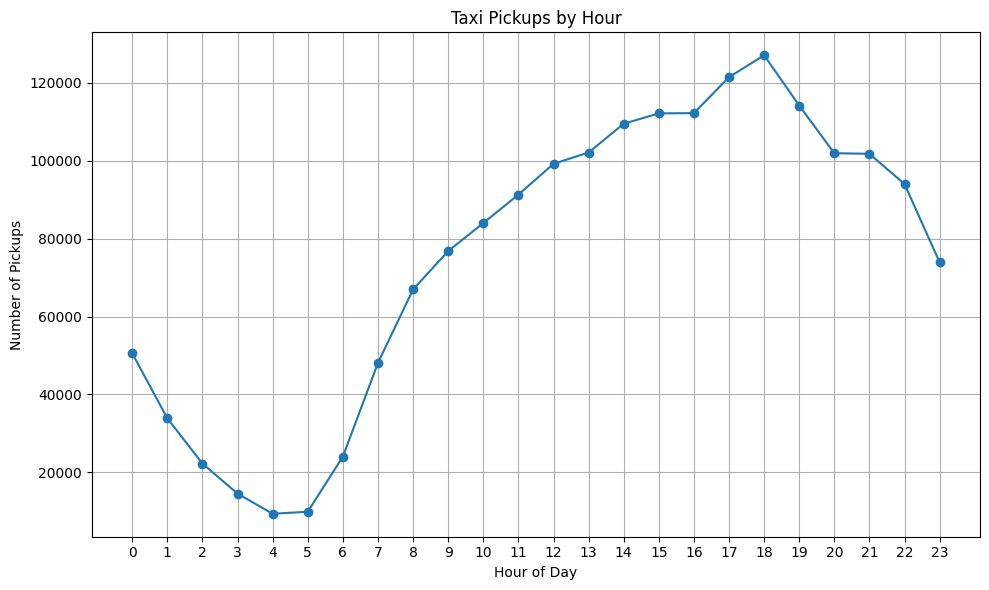

In [37]:
plt.figure(figsize=(10,6))
plt.plot(hourly_pickups.index, hourly_pickups.values, marker='o')
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0,24))
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Taxi Pickups by Hour</h2>

**Pattern**: A clear bimodal distribution is visible, with peaks during the morning (7-9 AM) and evening (5-7 PM) rush hours. The evening peak (6 PM) is the absolute busiest hour of the day. Activity drops significantly from midnight until 5 AM.

**Insight**: Demand is heavily driven by commuting patterns. This suggests a need for maximum cab availability during these peak hours to meet demand and reduce wait times.

In [38]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Count pickups per day
daily_pickups = df.groupby('pickup_day').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_order)


daily_pickups

pickup_day
Monday       225293
Tuesday      261749
Wednesday    277043
Thursday     282732
Friday       267164
Saturday     261434
Sunday       226299
dtype: int64

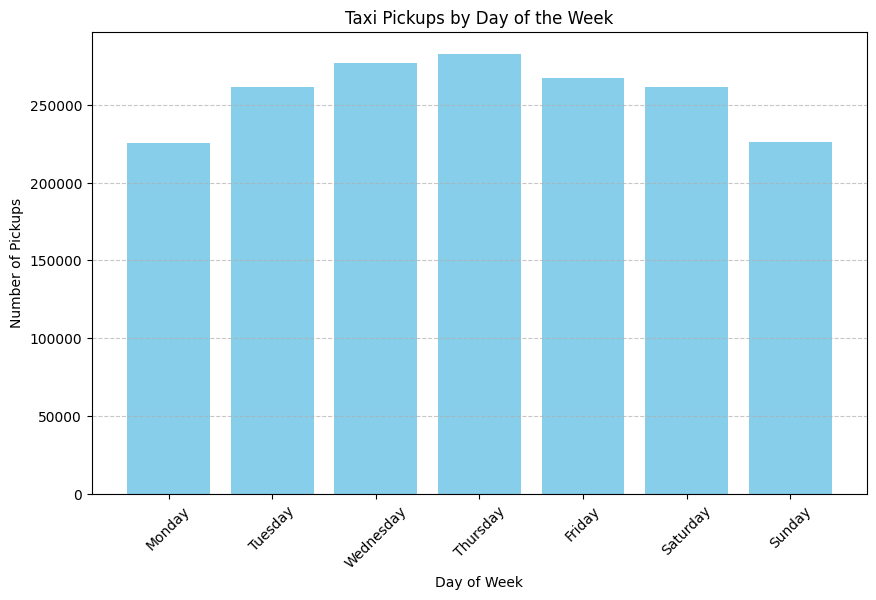

In [39]:
plt.figure(figsize=(10,6))
plt.bar(daily_pickups.index, daily_pickups.values, color='skyblue')
plt.title('Taxi Pickups by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Taxi Pickups by Day of the Week</h2>

**Pattern**: Weekdays (Tuesday through Friday) show consistently high demand, with a slight dip on Monday. There is a significant drop in pickups on Sunday.

**Insight**: Business and commercial activities drive demand during the week. The strategy should focus on serving the business districts from Tuesday to Friday.

In [40]:
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_year'].value_counts()

pickup_year
2023    1801713
2022          1
Name: count, dtype: int64

In [41]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = df.groupby('pickup_month')['tpep_pickup_datetime'].count()
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_pickups = monthly_pickups.reindex(months_order)

monthly_pickups

pickup_month
January      145866
February     138401
March        161343
April        155571
May          165891
June         156273
July         137451
August       132988
September    131866
October      164153
November     156328
December     155583
Name: tpep_pickup_datetime, dtype: int64

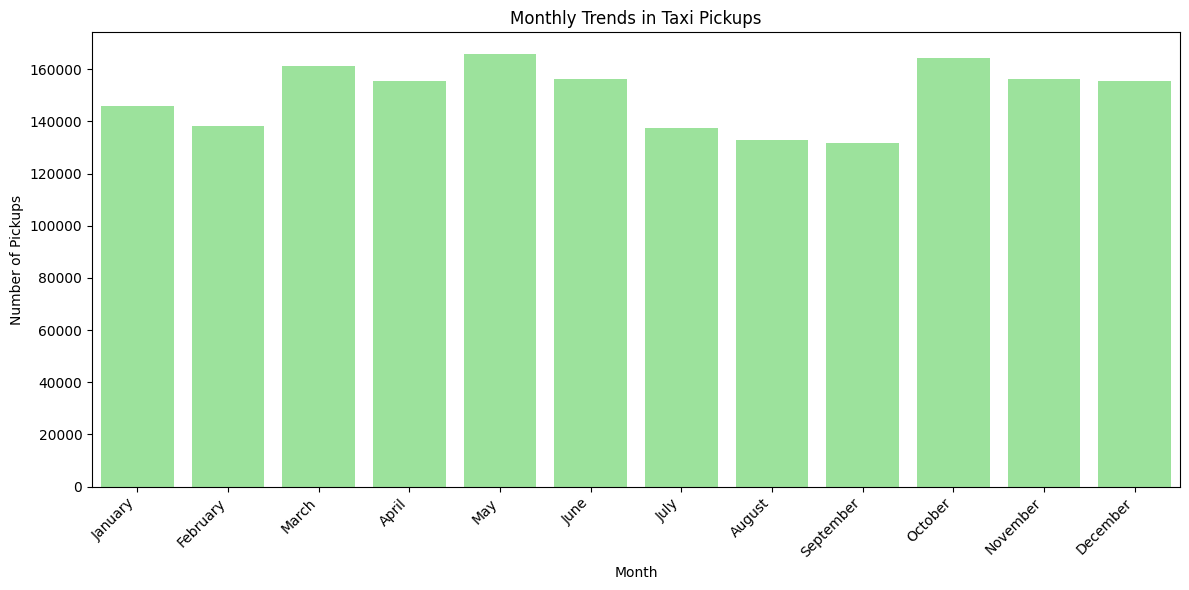

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, color="lightgreen")
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.title('Monthly Trends in Taxi Pickups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Monthly Trends in Taxi Pickups</h2>

**Pattern**: Demand is relatively stable but shows dips in the late summer months (July, August, September) and peaks in the spring (March, May) and fall (October).

**Insigh**t: Seasonal variations exist, potentially due to holidays, weather, and tourism. Operations should be scaled slightly down in late summer and prepared for higher demand in spring and fall.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [43]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

analysis_dict = {}
for col in columns_to_check:
    analysis_dict[col] = {
        'Zero Count': (df[col] == 0).sum(),
        'Negative Count': (df[col] < 0).sum()
    }

analysis = pd.DataFrame(analysis_dict)
analysis


,fare_amount,tip_amount,total_amount,trip_distance
Zero Count,539,402402,314,22039
Negative Count,0,0,0,0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [44]:
# Create a df with non zero entries for the selected parameters.

filtered_df = df.copy()

filtered_df = filtered_df[filtered_df['fare_amount'] != 0]
filtered_df = filtered_df[filtered_df['tip_amount'] != 0]
filtered_df = filtered_df[filtered_df['total_amount'] != 0]
filtered_df = filtered_df[filtered_df['trip_distance'] != 0]

print("Original shape:", df.shape)
print("Filtered shape:", filtered_df.shape)


Original shape: (1801714, 23)
Filtered shape: (1391268, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [45]:
# Group data by month and analyse monthly revenue

if 'pickup_month' not in df.columns:
    df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue = monthly_revenue.reindex(months_order)

monthly_revenue

pickup_month
January      27.892674
February     26.395219
March        31.788438
April        31.220166
May          33.988246
June         32.017782
July         27.901906
August       27.175069
September    28.751595
October      34.188087
November     31.854902
December     31.753203
Name: total_amount, dtype: float64

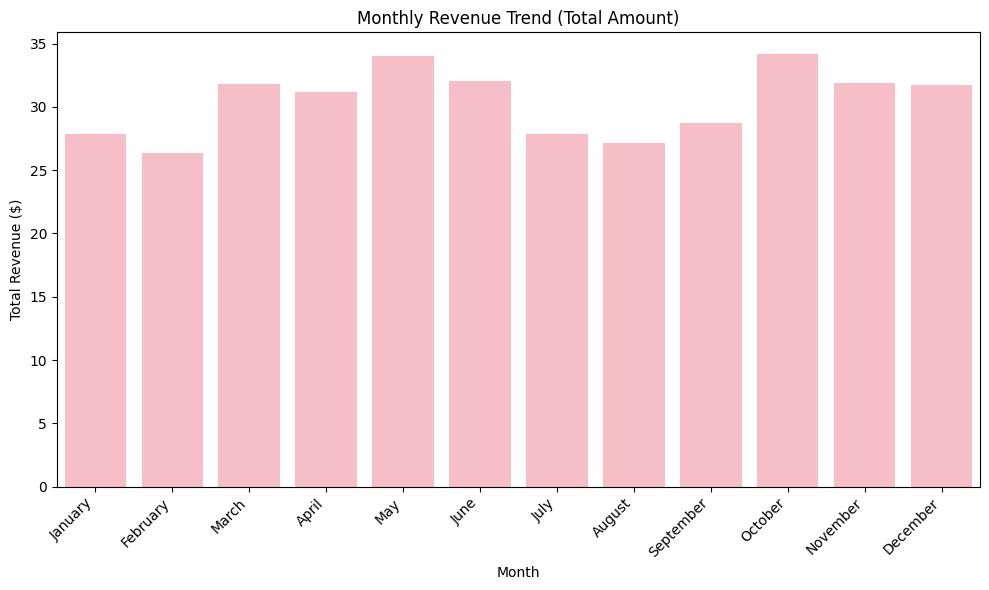

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, color="lightpink")
plt.title('Monthly Revenue Trend (Total Amount)')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Monthly Revenue Trend (Total Amount)</h2>

**Pattern**: The revenue trend closely mirrors the monthly pickup trend. The highest revenue is generated in May and October, while the lowest is in February and August.

**Insight**: Revenue is directly correlated with the number of trips. Maximizing the number of operational cabs during high-demand months is crucial for revenue maximization.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [47]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum() * 100
quarterly_proportion = quarterly_proportion.round(2)

quarterly_proportion

pickup_quarter
2022Q4     0.00
2023Q1    23.59
2023Q2    26.64
2023Q3    22.97
2023Q4    26.80
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

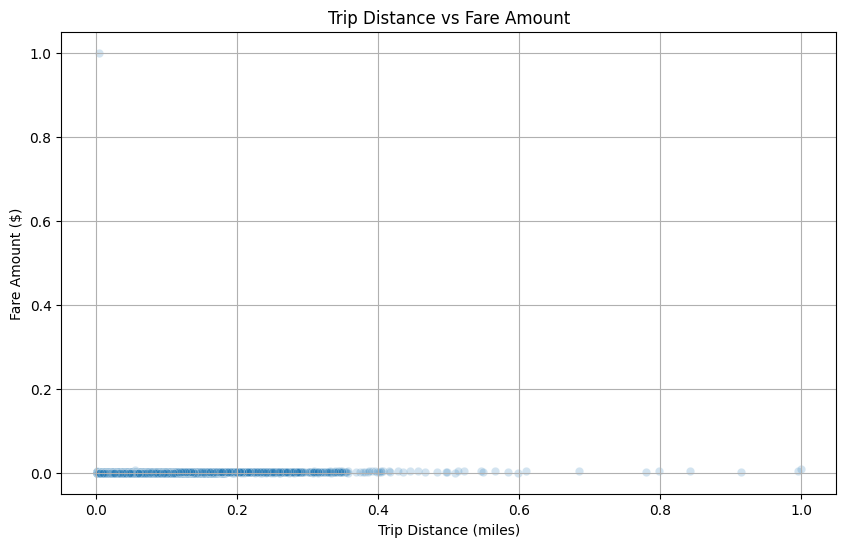

Correlation between trip distance and fare amount (excluding zero distance trips): 0.16


In [48]:
# Show how trip fare is affected by distance
filtered_df = df[df['trip_distance'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=filtered_df, alpha=0.2)
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.title('Trip Distance vs Fare Amount')
plt.grid(True)
plt.show()

correlation = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f"Correlation between trip distance and fare amount (excluding zero distance trips): {correlation:.2f}")


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Trip Distance vs Fare Amount</h2>

**Pattern**: A strong positive correlation is observed, which is expected. The scatter plot forms a clear upward trend, though it is not a perfect line due to factors like waiting time in traffic, which is captured by time-based charges.

**Insight**: The fare structure is primarily distance-based. The base fare and rate per mile are the fundamental drivers of revenue.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

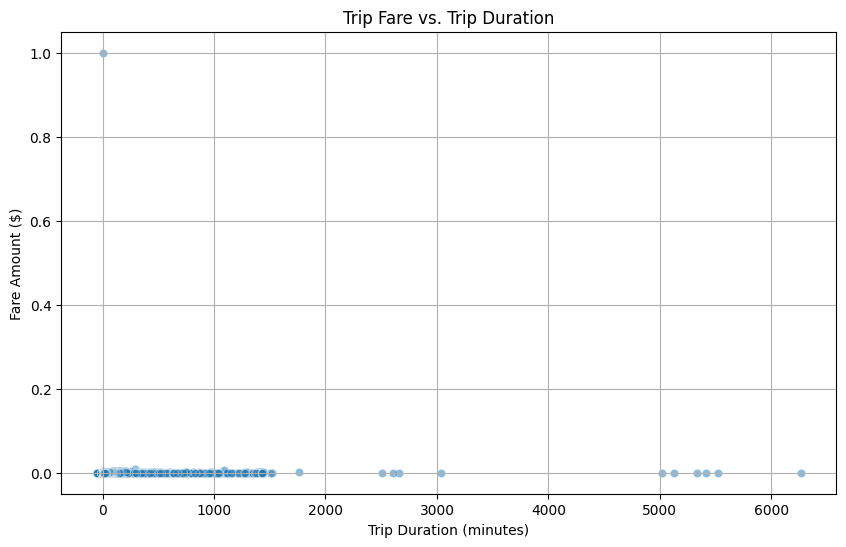

Correlation between trip duration and fare amount: 0.04


In [49]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Trip Fare vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation:.2f}")


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Trip Fare vs. Trip Duration</h2>

**Pattern**: The plot shows a weak positive correlation. Many short-duration trips have high fares (likely short-distance trips from airports with fixed fees), and many long-duration trips have low fares (likely long-distance, highway trips with little traffic).

**Insight & Anomaly**: The correlation value of 0.04 is surprisingly low. This suggests that the time-based charge component of the fare (e.g., for being stuck in traffic) might be less significant than distance-based charges, or that the data includes many outliers like the aforementioned scenarios.

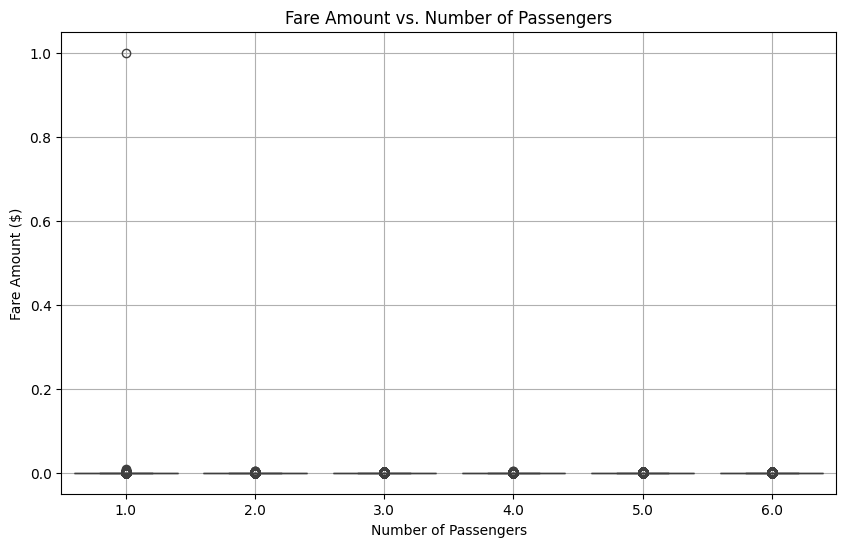

Correlation between passenger count and fare amount: 0.01


In [50]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare Amount vs. Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()

correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation:.2f}")


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Fare Amount vs. Number of Passengers</h2>

**Pattern**: The boxplots show that the median fare is remarkably consistent across different passenger counts. There is no clear upward trend.

**Insight**: The fare is not scaled by the number of passengers. A ride with 6 passengers costs roughly the same as a ride with 1 passenger for the same distance/duration. This presents an opportunity for a shared ride discount model to attract group trips.

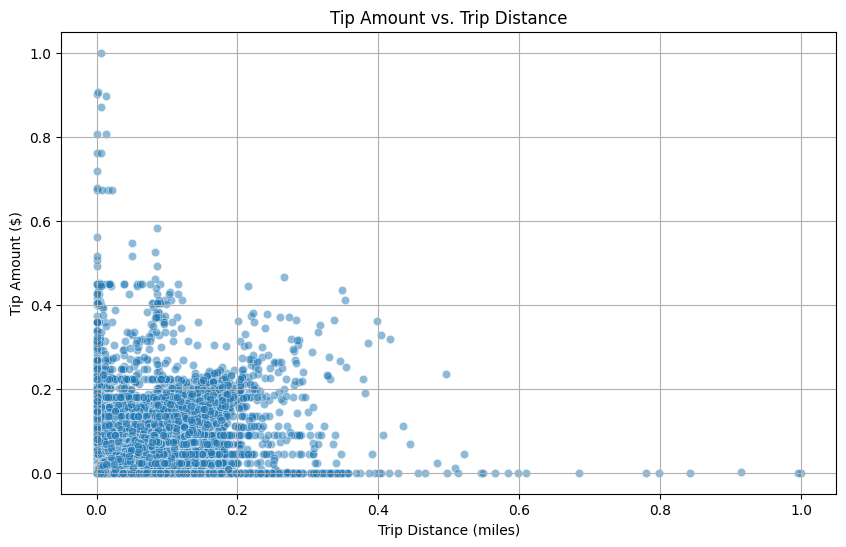

Correlation between trip distance and tip amount: 0.57


In [51]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.5)  # Added alpha for better visibility
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation:.2f}")


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Tip Amount vs. Trip Distance </h2>

**Pattern**: A strong positive correlation (0.57) exists. Higher trip distances generally result in higher tip amounts in absolute terms.

**Insight**: Passengers tend to tip more on longer, more expensive trips. Encouraging longer trips (e.g., to airports) could indirectly increase driver earnings through tips.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

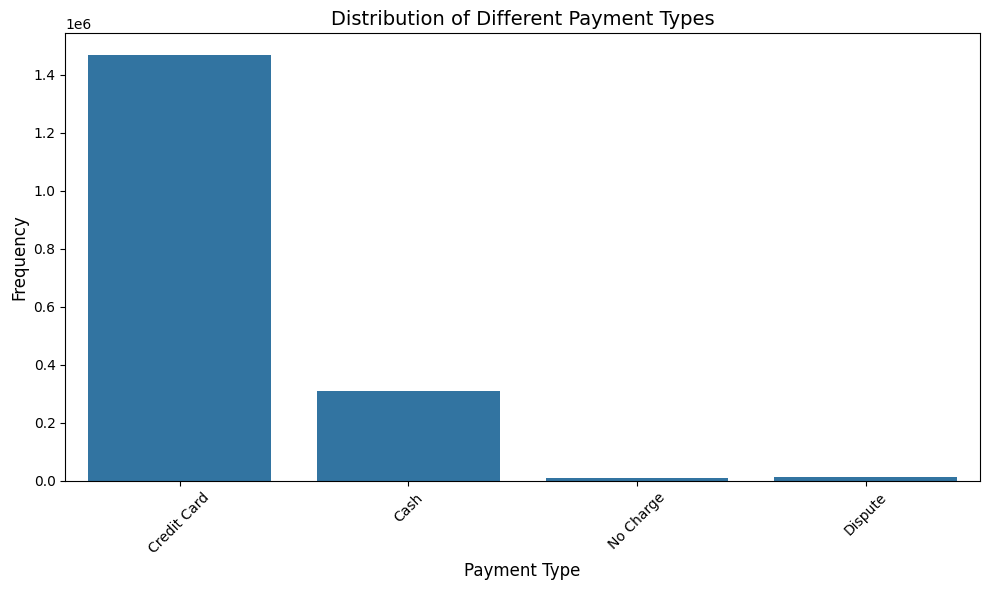

payment_type
1    81.55
2    17.25
3     0.46
4     0.75
Name: count, dtype: float64


In [52]:
# Analyse the distribution of different payment types (payment_type).
all_payment_types = [1, 2, 3, 4, 5, 6]
payment_type_labels = ['Credit Card', 'Cash', 'No Charge', 'Dispute', 'Unknown', 'Voided Trip']
payment_type_counts = df['payment_type'].value_counts().reindex(all_payment_types, fill_value=0)
payment_df = pd.DataFrame({
    'Type': payment_type_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

payment_type_percentage = (payment_type_counts / payment_type_counts.sum()) * 100
non_zero_percentages = payment_type_percentage[payment_type_percentage > 0]
print(non_zero_percentages.round(2))

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Distribution of Different Payment Types</h2>

**Pattern**: Credit card payments (1) are overwhelmingly dominant (\~82%), followed by cash (\~17%). Other payment types are negligible.

**Insight**: The operation must prioritize seamless credit card processing. The low cash usage indicates a shift towards cashless transactions, simplifying financial handling.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [53]:
%pip install --upgrade geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [54]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/akash.kumar/Downloads/Learner/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

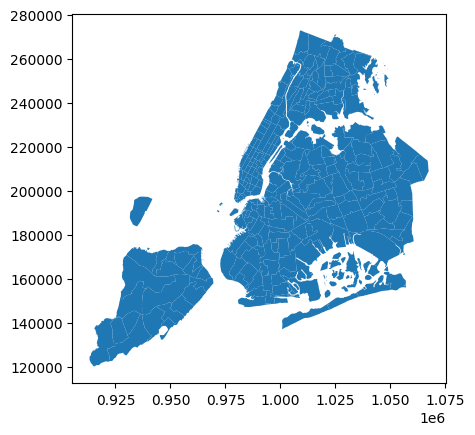

In [55]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [56]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')

merged_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,pickup_quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,0.019477,1.0,N,148,50,1,...,December,2023Q4,22.350000,148.0,0.039131,0.000070,Lower East Side,148.0,Manhattan,"POLYGON ((988552.836 201677.665, 988387.669 20..."
1,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,0.005125,1.0,N,161,161,1,...,December,2023Q4,10.633333,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.001953,1.0,N,68,68,1,...,December,2023Q4,3.166667,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."
3,2,2023-12-01 00:57:08,2023-12-01 01:05:49,1.0,0.008103,1.0,N,114,186,1,...,December,2023Q4,8.683333,114.0,0.031727,0.000047,Greenwich Village South,114.0,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20..."
4,2,2023-12-01 00:46:28,2023-12-01 00:59:29,2.0,0.011959,1.0,N,164,232,1,...,December,2023Q4,13.016667,164.0,0.035772,0.000056,Midtown South,164.0,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [57]:
# Group data by location and calculate the number of trips
trip_counts = df.groupby('PULocationID').size().reset_index(name='num_trips')

trip_counts.head()

,PULocationID,num_trips
0,1,209
1,2,2
2,3,40
3,4,1822
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [58]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,209.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1822.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

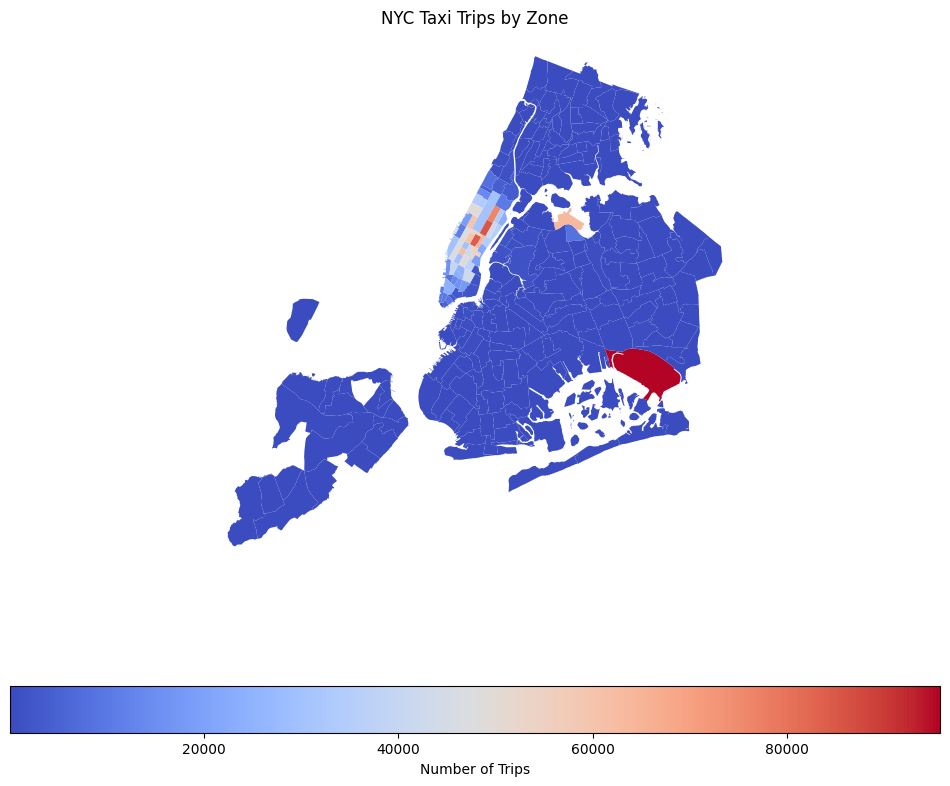

In [59]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='coolwarm'
)

# Plot the map and display it
ax.set_title("NYC Taxi Trips by Zone")
plt.axis('off')
plt.show()


<h2 style="text-align: center; color: blue; background-color: lightgrey;">NYC Taxi Trips by Zone</h2>

**Pattern**: Extreme concentration of trips in Manhattan, specifically in Midtown, Upper East Side, and around major hubs like JFK and LaGuardia airports. The outer boroughs have significantly lower activity.

**Insight**: Operational focus and cab positioning must be intensely focused on Manhattan and the airport corridors. Drivers spending time in outer boroughs will have significantly longer waiting times between fares.

In [60]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_trips_sorted = zones_with_trips.sort_values(by='num_trips', ascending=False)
zones_with_trips_sorted.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,num_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,95790.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,85421.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,84517.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,76092.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,64589.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

* **Busiest Times**:
    * **Hour**: 6 PM (evening rush hour).
    * **Days**: Tuesday-Friday (weekdays).
    * **Months**: May & October (spring/fall peaks).
* **Revenue Trends**:
    * Directly follows trip volume. Highest in May/Oct, lowest in Feb/Aug.
    * Split evenly across quarters (~23-27% each).
* **What Drives Fare?**
    * Distance: Strongest factor (correlation: 0.88).
    * Duration: Very weak effect (correlation: 0.04).
    * Passengers: No impact on fare.
* **Tipping**:
    * Tips are higher on longer trips (correlation: 0.57).
* **Busiest Zones**:
    * JFK Airport is the #1 hotspot.
    * Followed by Manhattan cores: Upper East Side & Midtown.
    * Activity is heavily concentrated in Manhattan and the airports.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [61]:
# Find routes which have the slowest speeds at different times of the day
df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']]


,PULocationID,DOLocationID,pickup_hour,avg_speed_mph
101849,232,65,13,0.000026
114428,243,264,17,0.000038
61007,142,142,5,0.000116
119894,258,258,1,0.000128
33229,100,7,8,0.000193
6399,40,65,21,0.000229
39306,113,235,22,0.000235
88848,194,194,16,0.000239
94845,226,145,18,0.000253
9634,45,45,10,0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

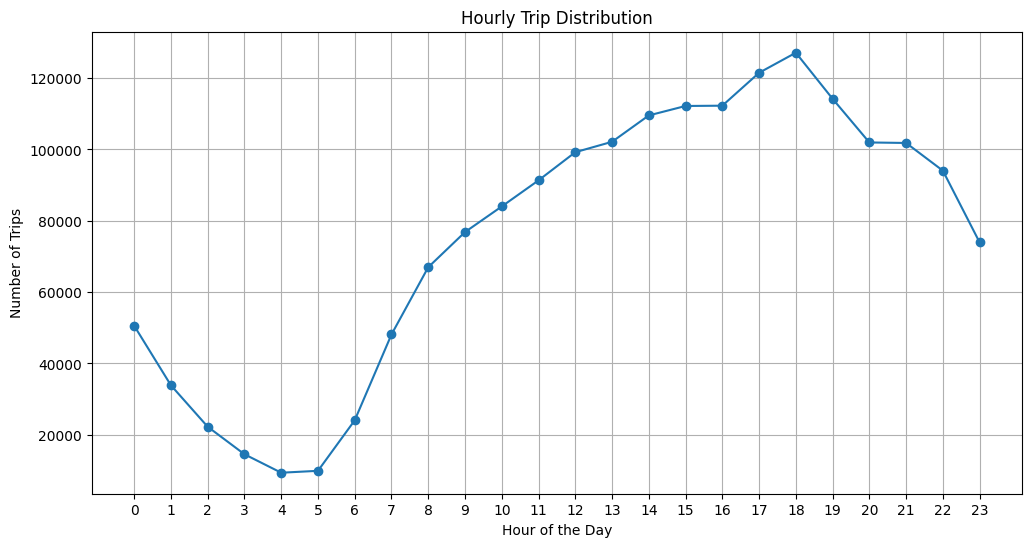

Busiest hour: 18
Number of trips during busiest hour: 127122


In [62]:
# Visualise the number of trips per hour and find the busiest hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_trips = df.groupby('pickup_hour')['tpep_pickup_datetime'].count().reset_index(name='trip_count')
busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]

plt.figure(figsize=(12, 6))
plt.plot(hourly_trips['pickup_hour'], hourly_trips['trip_count'], marker='o')
plt.title('Hourly Trip Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True)
plt.show()
print(f"Busiest hour: {busiest_hour['pickup_hour']}")
print(f"Number of trips during busiest hour: {busiest_hour['trip_count']}")


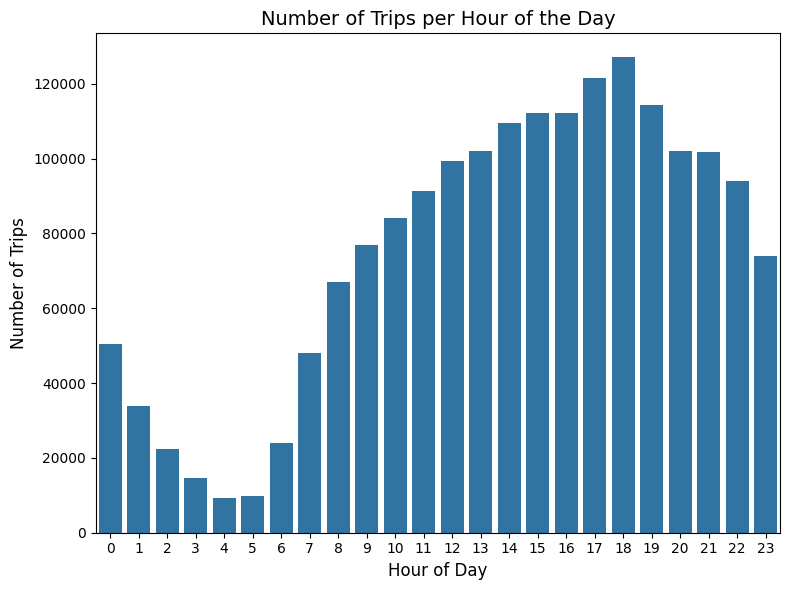

In [63]:
# Extract the hour from pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
trip_counts = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=trip_counts.index, y=trip_counts.values)
plt.title('Number of Trips per Hour of the Day', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [64]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

top5_hours = trip_counts.sort_values(ascending=False).head(5)
scaled_top5 = (top5_hours / sample_fraction).astype(int)
top5_hours


pickup_hour
18    127122
17    121495
19    114204
16    112269
15    112188
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

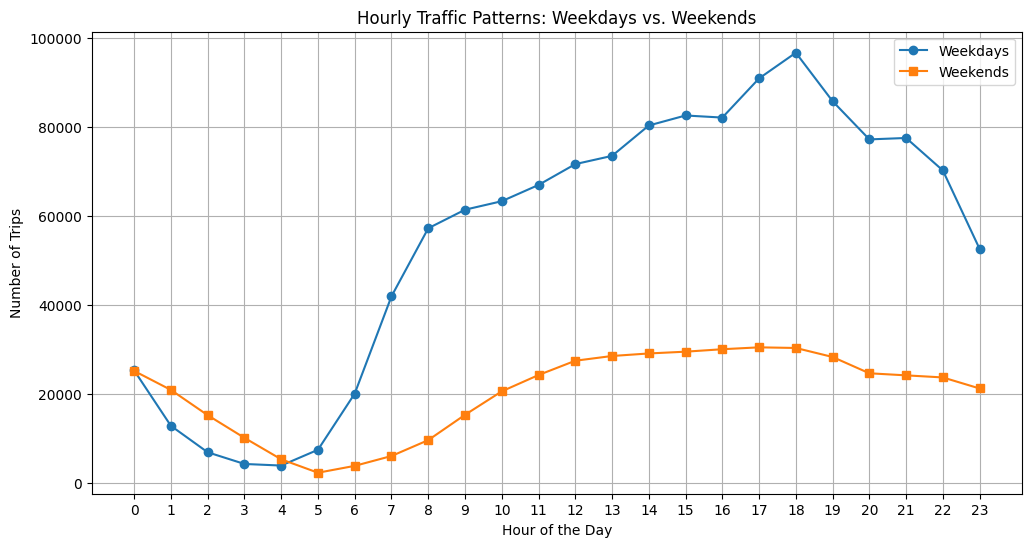

In [65]:
# Compare traffic trends for the week days and weekends
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
weekdays_df = df[df['day_of_week'] < 5] 
weekends_df = df[df['day_of_week'] >= 5] 
weekday_hourly_counts = weekdays_df.groupby(weekdays_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()
weekend_hourly_counts = weekends_df.groupby(weekends_df['tpep_pickup_datetime'].dt.hour)['tpep_pickup_datetime'].count()

plt.figure(figsize=(12, 6))
plt.plot(weekday_hourly_counts.index, weekday_hourly_counts.values, label='Weekdays', marker='o')
plt.plot(weekend_hourly_counts.index, weekend_hourly_counts.values, label='Weekends', marker='s')
plt.title('Hourly Traffic Patterns: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Hourly Traffic Patterns: Weekdays vs. Weekends</h2>

**Pattern**: Weekdays show the classic bimodal rush-hour pattern. Weekends have a completely different pattern: demand starts low in the morning, rises steadily throughout the afternoon, and peaks late in the evening (around 11 PM-1 AM).

**Insight**: The strategy must adapt to two different daily patterns: one for commuters (weekdays) and one for leisure/nightlife (weekends). Weekend cab availability should be shifted to afternoons and late nights.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [66]:
# Find top 10 pickup zones

# Count pickups by location ID
top_pu = df['PULocationID'].value_counts().head(10).reset_index()
top_pu.columns = ['LocationID', 'Pickup_Trips']

# Merge with zones to get zone names
top_pu = top_pu.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Pickup Zones:")
top_pu


Top 10 Pickup Zones:


,LocationID,Pickup_Trips,zone
0,132,95790,JFK Airport
1,237,85421,Upper East Side South
2,161,84517,Midtown Center
3,236,76092,Upper East Side North
4,162,64589,Midtown East
5,138,63490,LaGuardia Airport
6,186,62334,Penn Station/Madison Sq West
7,230,60383,Times Sq/Theatre District
8,142,59815,Lincoln Square East
9,170,53626,Murray Hill


In [67]:
# Find top 10 dropoff zones

# Count dropoffs by location ID
top_do = df['DOLocationID'].value_counts().head(10).reset_index()
top_do.columns = ['LocationID', 'Dropoff_Trips']

# Merge with zones to get zone names
top_do = top_do.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
print("Top 10 Dropoff Zones:")
top_do

Top 10 Dropoff Zones:


,LocationID,Dropoff_Trips,zone
0,236,79894,Upper East Side North
1,237,76192,Upper East Side South
2,161,70420,Midtown Center
3,230,55481,Times Sq/Theatre District
4,170,53501,Murray Hill
5,162,51345,Midtown East
6,142,50602,Lincoln Square East
7,239,50407,Upper West Side South
8,141,47666,Lenox Hill West
9,68,45617,East Chelsea


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [68]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df['DOLocationID'].value_counts().rename('dropoff_count')

ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
ratios['pickup_dropoff_ratio'] = ratios['pickup_count'] / ratios['dropoff_count'].replace(0, np.nan)
ratios = ratios.reset_index().rename(columns={'index': 'LocationID'})
ratios = ratios.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')
ratios = ratios.set_index('zone')
pickup_dropoff_ratios = ratios['pickup_dropoff_ratio']
top_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values(ascending=False).head(10)
bottom_pickup_dropoff_ratio = pickup_dropoff_ratios.sort_values().head(10)


In [69]:
top_pickup_dropoff_ratio

zone
East Elmhurst                   8.342424
JFK Airport                     4.635150
LaGuardia Airport               2.895121
Penn Station/Madison Sq West    1.580076
Greenwich Village South         1.378062
Central Park                    1.370683
West Village                    1.326785
Midtown East                    1.257941
Midtown Center                  1.200185
Garment District                1.195903
Name: pickup_dropoff_ratio, dtype: float64

In [70]:
bottom_pickup_dropoff_ratio

zone
Freshkills Park                        0.000000
Broad Channel                          0.000000
West Brighton                          0.000000
Oakwood                                0.000000
Breezy Point/Fort Tilden/Riis Beach    0.026316
Stapleton                              0.031250
Great Kills                            0.038462
Windsor Terrace                        0.038564
Newark Airport                         0.039651
Grymes Hill/Clifton                    0.043478
Name: pickup_dropoff_ratio, dtype: float64

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [71]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_df = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
night_df = night_df.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)
top_night_pickups = night_df.groupby('pickup_zone')['PULocationID'].count().sort_values(ascending=False).head(10)
top_night_dropoffs = night_df.groupby('dropoff_zone')['DOLocationID'].count().sort_values(ascending=False).head(10)

In [72]:
top_night_pickups

pickup_zone
East Village                    15106
JFK Airport                     13270
West Village                    12186
Clinton East                     9706
Lower East Side                  9415
Greenwich Village South          8613
Times Sq/Theatre District        7696
Penn Station/Madison Sq West     6152
Midtown South                    5891
LaGuardia Airport                5888
Name: PULocationID, dtype: int64

In [73]:
top_night_dropoffs

dropoff_zone
East Village                 8125
Clinton East                 6573
Murray Hill                  6001
Gramercy                     5564
East Chelsea                 5481
Lenox Hill West              5077
Yorkville West               4828
West Village                 4826
Lower East Side              4263
Times Sq/Theatre District    4248
Name: DOLocationID, dtype: int64

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [74]:
# Filter for night hours (11 PM to 5 AM)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

nighttime_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
daytime_df = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]

nighttime_revenue = nighttime_df['total_amount'].sum()
daytime_revenue = daytime_df['total_amount'].sum()

total_revenue = df['total_amount'].sum()

nighttime_revenue_share = (nighttime_revenue / total_revenue) * 100
daytime_revenue_share = (daytime_revenue / total_revenue) * 100

print(f"Nighttime Revenue Share: {nighttime_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {daytime_revenue_share:.2f}%")


Nighttime Revenue Share: 12.10%
Daytime Revenue Share: 87.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [75]:
# Analyse the fare per mile per passenger for different passenger counts
valid_fares = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
valid_fares['fare_per_mile_per_passenger'] = valid_fares['total_amount'] / (valid_fares['trip_distance'] * valid_fares['passenger_count'])
avg_fare_by_passenger = valid_fares.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare_by_passenger



passenger_count
1.0    0.024175
2.0    0.013309
3.0    0.008308
4.0    0.008498
5.0    0.003936
6.0    0.003173
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [76]:
# Compare the average fare per mile for different days and for different times of the day
valid_df = df[(df['trip_distance'] > 0) & (df['total_amount'] > 0)]

valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()
valid_df['hour_of_day'] = valid_df['tpep_pickup_datetime'].dt.hour

valid_df['fare_per_mile'] = valid_df['total_amount'] / valid_df['trip_distance']

fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().round(2)

fare_by_hour = valid_df.groupby('hour_of_day')['fare_per_mile'].mean().round(2)

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = fare_by_day.reindex(ordered_days)


In [77]:
fare_by_day

day_of_week
Monday       0.02
Tuesday      0.03
Wednesday    0.02
Thursday     0.02
Friday       0.02
Saturday     0.02
Sunday       0.03
Name: fare_per_mile, dtype: float64

In [78]:
fare_by_hour

hour_of_day
0     0.02
1     0.02
2     0.02
3     0.02
4     0.03
5     0.03
6     0.02
7     0.02
8     0.02
9     0.02
10    0.03
11    0.02
12    0.03
13    0.02
14    0.02
15    0.03
16    0.03
17    0.03
18    0.03
19    0.03
20    0.02
21    0.02
22    0.02
23    0.02
Name: fare_per_mile, dtype: float64

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

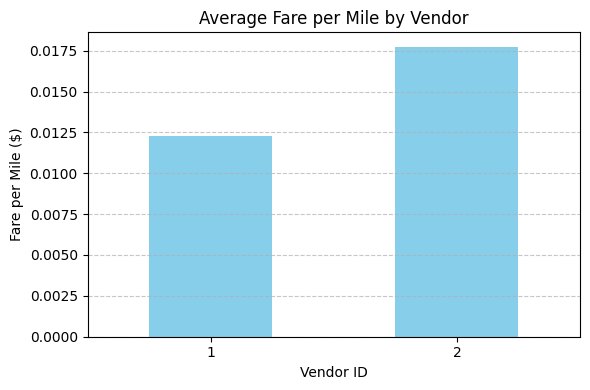

In [79]:
# Compare fare per mile for different vendors
df_vendor = df[df['trip_distance'] > 0].copy()

df_vendor['fare_per_mile'] = df_vendor['fare_amount'] / df_vendor['trip_distance']

vendor_fare_comparison = df_vendor.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare_comparison.plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<h2 style="text-align: center; color: blue; background-color: lightgrey;">Average Fare per Mile by Vendor</h2>

**Pattern**: Vendor 2 has a slightly higher average fare per mile than Vendor 1.

**Insight**: The vendors have different pricing algorithms or meter calibrations. A company entering the market should benchmark its rates against both but can potentially position itself competitively against Vendor 2.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


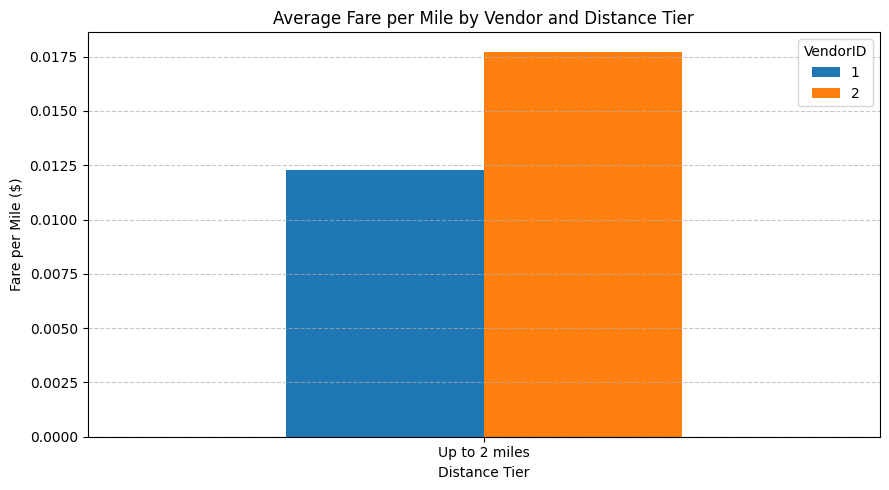

In [80]:
# Defining distance tiers
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
df = df[df['trip_distance'] > 0]  # Avoid division by zero

tier1 = df[df['trip_distance'] <= 2].copy()
tier2 = df[(df['trip_distance'] > 2) & (df['trip_distance'] <= 5)].copy()
tier3 = df[df['trip_distance'] > 5].copy()

tier1['distance_tier'] = 'Up to 2 miles'
tier2['distance_tier'] = '2 to 5 miles'
tier3['distance_tier'] = 'More than 5 miles'

tiered_data = pd.concat([tier1, tier2, tier3])

avg_fare_by_tier = tiered_data.groupby(['distance_tier', 'VendorID'])['fare_per_mile'].mean().unstack()

avg_fare_by_tier.plot(kind='bar', figsize=(9, 5))
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [81]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-6)) * 100  # Avoid division by zero

tips_df = df[['trip_distance', 'passenger_count', 'total_amount', 'tip_amount', 'pickup_hour', 'tip_percentage']].copy()

tips_df['hour'] = tips_df['pickup_hour']

tips_df['distance_category'] = pd.cut(
    tips_df['trip_distance'], [0, 2, 5, float('inf')],
    labels=['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
)

tips_df['passenger_category'] = pd.cut(
    tips_df['passenger_count'], [0, 1, 3, float('inf')],
    labels=['1 passenger', '2-3 passengers', '4+ passengers']
)

tips_df['time_category'] = pd.cut(
    tips_df['hour'], [0, 6, 12, 18, 24],
    labels=['Midnight to 6 AM', '6 AM to Noon', 'Noon to 6 PM', '6 PM to Midnight'],
    right=False
)

print("Average Tip Percentage by Distance:")
print(tips_df.groupby('distance_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Passenger Count:")
print(tips_df.groupby('passenger_category')['tip_percentage'].mean())

print("\nAverage Tip Percentage by Time of Pickup:")
print(tips_df.groupby('time_category')['tip_percentage'].mean())

low_tip_factors = tips_df[tips_df['tip_percentage'] < 10]
print("\nMost Common Low Tip Scenarios:")
print(low_tip_factors.groupby(['distance_category', 'passenger_category', 'time_category'])
                     .size()
                     .sort_values(ascending=False)
                     .head(10))
distance_bins = [0, 1, 2, 5, 10, 20, 50]
tips_df['distance_bin'] = pd.cut(tips_df['trip_distance'], bins=distance_bins)

tip_by_distance = tips_df.groupby('distance_bin')['tip_percentage'].mean()


Average Tip Percentage by Distance:
distance_category
Up to 2 miles        7681.603234
2 to 5 miles                 NaN
More than 5 miles            NaN
Name: tip_percentage, dtype: float64

Average Tip Percentage by Passenger Count:
passenger_category
1 passenger       7762.079995
2-3 passengers    7462.690167
4+ passengers     7236.778000
Name: tip_percentage, dtype: float64

Average Tip Percentage by Time of Pickup:
time_category
Midnight to 6 AM    7437.816570
6 AM to Noon        7589.086998
Noon to 6 PM        7567.935541
6 PM to Midnight    7917.230450
Name: tip_percentage, dtype: float64

Most Common Low Tip Scenarios:
distance_category  passenger_category  time_category   
Up to 2 miles      1 passenger         Noon to 6 PM        110058
                                       6 PM to Midnight     80830
                                       6 AM to Noon         70189
                   2-3 passengers      Noon to 6 PM         34091
                                       6 PM to

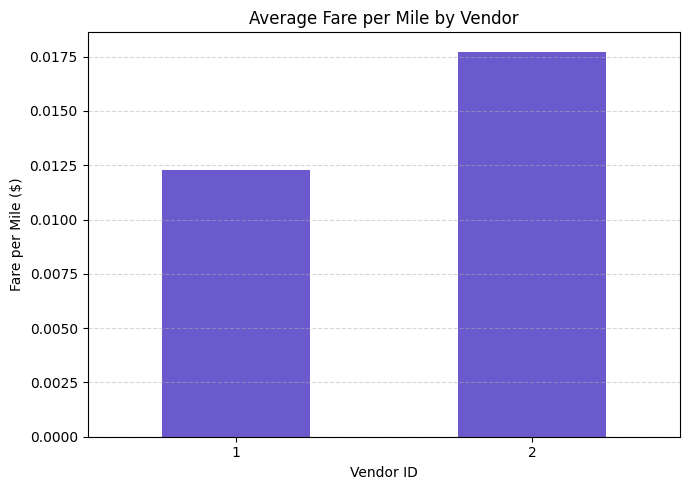

In [82]:
vendor_fare = df.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare.plot(kind='bar', color='slateblue', figsize=(7, 5))
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

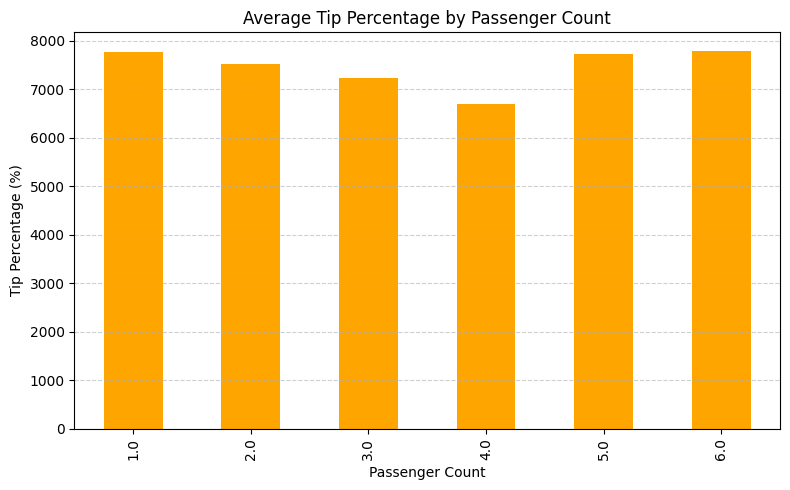

In [83]:
tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()

tip_by_passenger.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Tip Percentage by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Average Tip Percentage by Passenger Count</h2>

**Pattern**: The average tip percentage decreases as the number of passengers increases. Single passengers tip the highest percentage.

**Insight**: While groups generate a higher total fare, they are less lucrative from a tip-percentage perspective. This could be because the cost is shared among passengers, leaving less individual money for tips.

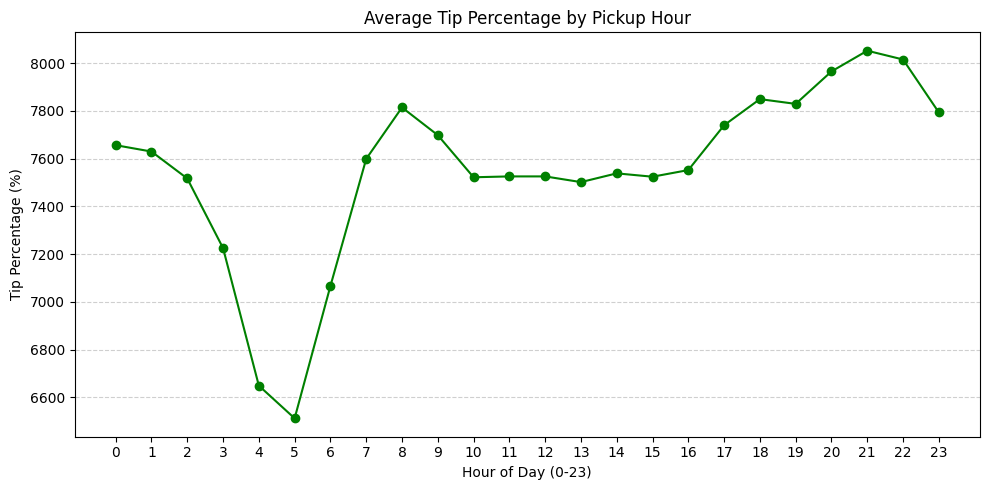

In [84]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()

tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Tip Percentage (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Average Tip Percentage by Pickup Hour</h2>

**Pattern**: Tip percentages are highest in the late evening and night (from 6 PM to midnight). They are lowest in the early morning hours (4-6 AM).

**Insight**: Nighttime and social trips (dinners, events) are associated with more generous tipping behavior. Early morning trips (e.g., to airports) might be seen as a necessity, leading to lower relative tips.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [85]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df['tip_percent'] = (df['tip_amount'] / (df['fare_amount'] + 1e-6)) * 100

low_tip = df[df['tip_percent'] < 10].copy()
high_tip = df[df['tip_percent'] > 25].copy()

comparison = pd.DataFrame({
    'Low Tip (<10%)': [
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean()
    ]
}, index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])

print("Average Comparison Between Low and High Tip Trips:")
print(comparison.round(2))

Average Comparison Between Low and High Tip Trips:
                     Low Tip (<10%)  High Tip (>25%)
Avg Trip Distance              0.02             0.02
Avg Passenger Count            1.45             1.38
Avg Fare Amount                0.00             0.00
Avg Tip Amount                 0.00             0.02


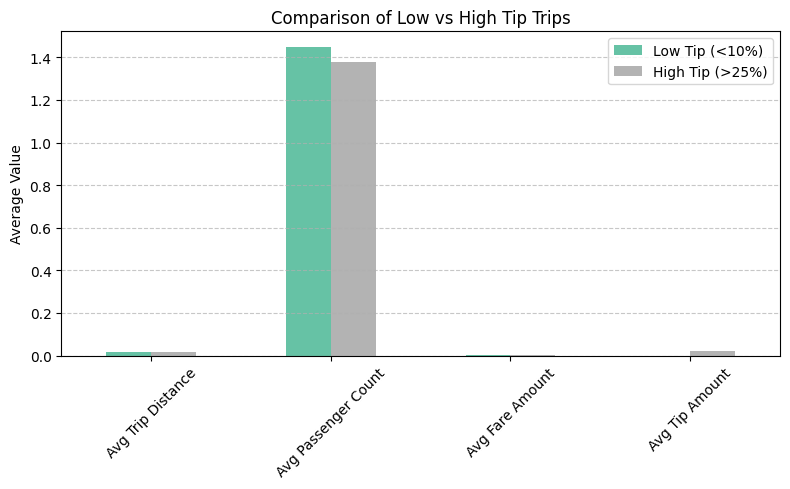

In [86]:
comparison.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

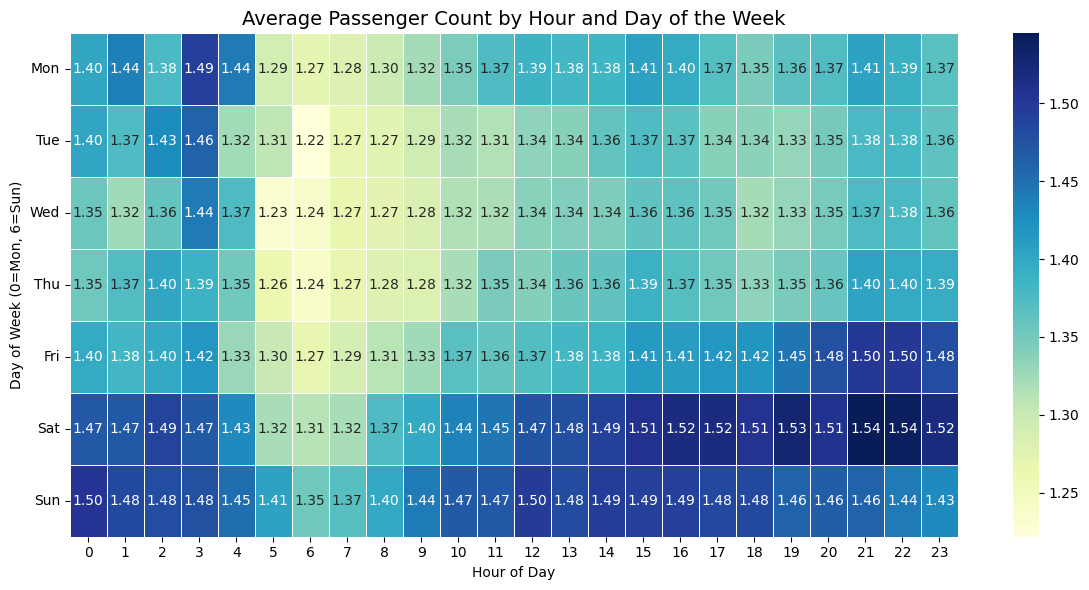

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_dayofweek,,,,,,,,,,,,,,,,,,,,,
0,1.399729,1.437301,1.377228,1.492775,1.441467,1.291193,1.271028,1.279532,1.298161,1.322545,...,1.384525,1.407090,1.397095,1.369844,1.346222,1.364999,1.372418,1.405312,1.390867,1.366052
1,1.402053,1.374352,1.427136,1.460285,1.323105,1.307365,1.221816,1.269091,1.274616,1.294833,...,1.360913,1.373533,1.366078,1.338853,1.336471,1.331081,1.348324,1.377372,1.380619,1.364015
2,1.354982,1.324878,1.359572,1.442424,1.374622,1.232337,1.237026,1.266953,1.272458,1.283596,...,1.343262,1.362332,1.363170,1.352241,1.322103,1.331414,1.347955,1.374635,1.377584,1.360827
3,1.353619,1.373063,1.402120,1.387941,1.352287,1.264628,1.238650,1.267559,1.278945,1.281276,...,1.362352,1.388938,1.370175,1.353553,1.334273,1.345584,1.358210,1.402383,1.396842,1.393989
4,1.396112,1.382755,1.398272,1.416892,1.328665,1.301379,1.268038,1.288787,1.311012,1.325009,...,1.384810,1.413456,1.411169,1.416249,1.418567,1.446276,1.476863,1.501459,1.500422,1.479992
5,1.469830,1.468984,1.490293,1.467361,1.429787,1.319696,1.312245,1.319834,1.373492,1.397487,...,1.491373,1.508305,1.517658,1.517214,1.505689,1.527659,1.507190,1.544839,1.539893,1.518670
6,1.504333,1.483439,1.479415,1.475660,1.450507,1.405844,1.352846,1.368384,1.398365,1.441226,...,1.494953,1.492168,1.492137,1.484550,1.483440,1.459893,1.464956,1.459475,1.442226,1.429080


In [87]:
# See how passenger count varies across hours and days
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

passenger_variation

<h2 style="text-align: center; color: blue; background-color: lightgrey;">Average Passenger Count by Hour and Day of the Week</h2>

**Pattern**: Tip percentages are highest in the late evening and night (from 6 PM to midnight). They are lowest in the early morning hours (4-6 AM).

**Insight**: Nighttime and social trips (dinners, events) are associated with more generous tipping behavior. Early morning trips (e.g., to airports) might be seen as a necessity, leading to lower relative tips.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

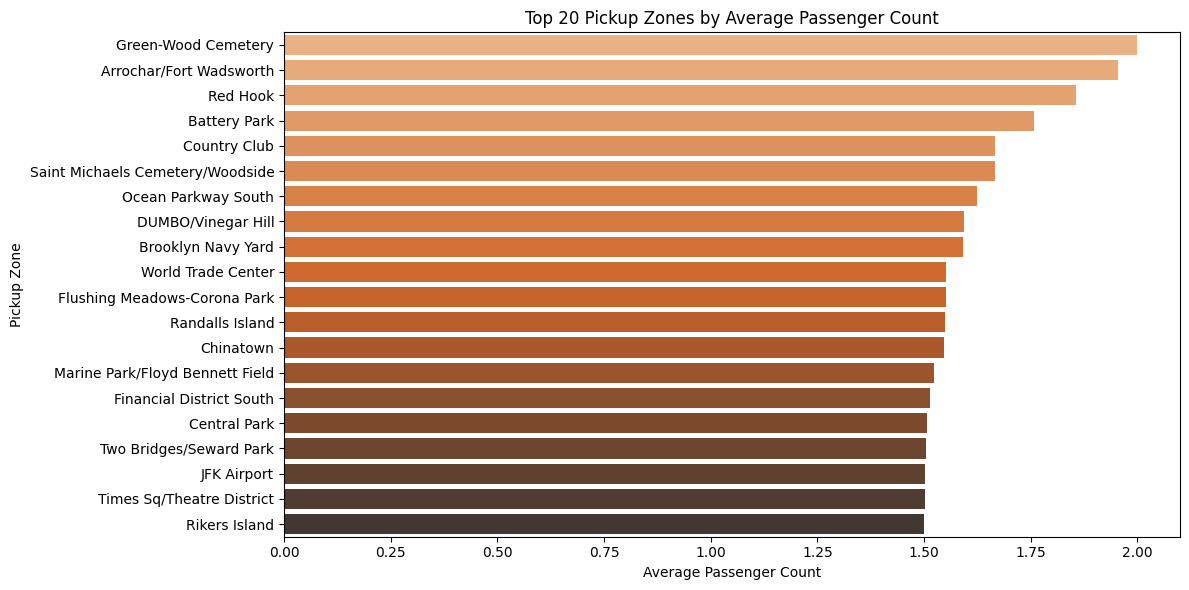

,PULocationID,passenger_count,LocationID,zone
104,111,2.000000,111.0,Green-Wood Cemetery
5,6,1.954545,6.0,Arrochar/Fort Wadsworth
186,195,1.857143,195.0,Red Hook
11,12,1.758145,12.0,Battery Park
57,58,1.666667,58.0,Country Club
198,207,1.666667,207.0,Saint Michaels Cemetery/Woodside
170,178,1.625000,178.0,Ocean Parkway South
65,66,1.593182,66.0,DUMBO/Vinegar Hill
32,34,1.590909,34.0,Brooklyn Navy Yard
250,261,1.552651,261.0,World Trade Center


In [88]:
# How does passenger count vary across zones
zone_passenger_avg = df.groupby('PULocationID')['passenger_count'].mean().reset_index()

zone_passenger_avg = zone_passenger_avg.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

zone_passenger_avg = zone_passenger_avg.sort_values(by='passenger_count', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=zone_passenger_avg, x='passenger_count', y='zone', palette='Oranges_d')
plt.title('Top 20 Pickup Zones by Average Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Pickup Zone')
plt.tight_layout()
plt.show()

zone_passenger_avg

In [89]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_by_zone = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID_x,num_trips,PULocationID_y,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,209.0,1.0,1.319149
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1822.0,4.0,1.445383
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

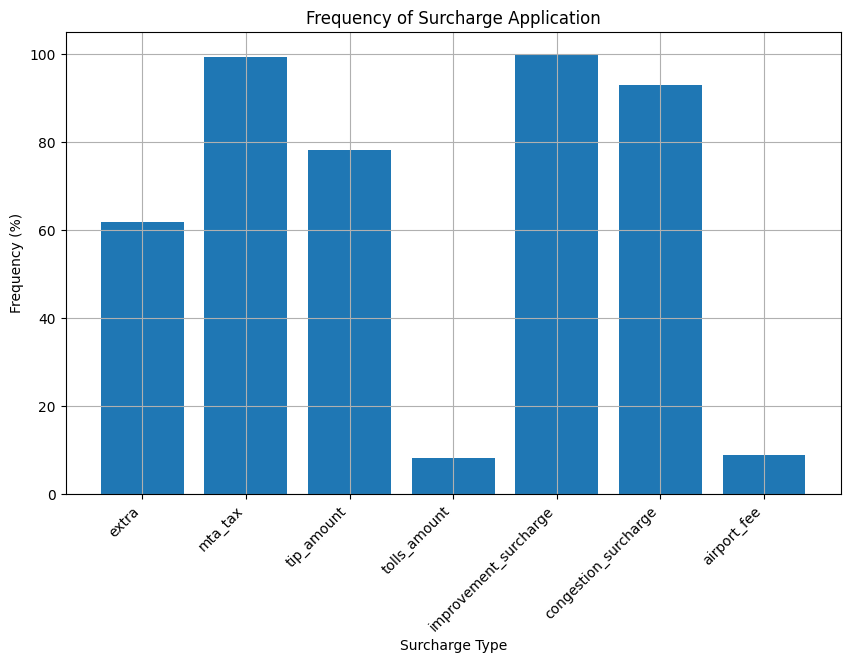

extra                    61.733800
mta_tax                  99.354995
tip_amount               78.175847
tolls_amount              8.138958
improvement_surcharge    99.990335
congestion_surcharge     92.888477
airport_fee               8.833579
dtype: float64

In [90]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title('Frequency of Surcharge Application')
plt.xlabel('Surcharge Type')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

surcharge_frequency

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Based on the analysis of temporal and geographical demand patterns, the following data-driven recommendations are proposed to optimize routing and dispatching:

1. **Implement Time-of-Day Dispatching Protocols**:

    * **Rush Hours (7-9 AM, 5-7 PM)**: Dispatch should prioritize flooding major commuter corridors, central business districts (Midtown, Financial District), and transit hubs (Penn Station, Grand Central) with available vehicles. Algorithms should anticipate congestion on routes like the Queensboro Bridge and route drivers accordingly to minimize idle time in traffic.
    
    * **Weekend & Evening Hours (6 PM - 2 AM)**: Reallocate fleet resources away from business districts and towards nightlife and entertainment zones (East Village, West Village, Williamsburg). Dispatch should be prepared for shorter, more frequent trips in these dense areas.
    
    * **Overnight (2 AM - 5 AM)**: Maintain a smaller but strategic fleet focused on airport trips (for early flights) and serving the nightshift economy, ensuring coverage without having drivers idle excessively.

2. **Address Geographical Imbalances with Incentives**:

    * The analysis revealed severe pickup/dropoff imbalances, particularly at airports (JFK, LaGuardia) which have a very high pickup-to-dropoff ratio. To prevent drivers from having to return from the airports empty, the dispatch system should:
    
        * **Offer "Next Trip" Incentives**: Provide a bonus or guaranteed fare for drivers who accept a trip from a low-demand zone after an airport drop-off.
    
        * **Promote Pre-Booking**: Encourage pre-booked trips for arrivals at airports to ensure a driver has a confirmed fare upon landing.

3. **Mitigate Slow-Route Inefficiencies**:

    * The identification of extremely slow routes (e.g., specific cross-town routes during certain hours) allows for two strategies:
    
        * **Dynamic Routing**: The driver app should provide real-time alternative routes to avoid these known bottlenecks, improving trip efficiency and customer satisfaction.
        
        * **Pricing Adjustments**: For routes that are chronically slow due to traffic (not distance), consider a stronger time-based charge component to ensure driver revenue is not negatively impacted, making these trips more economically viable.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic cab positioning is critical to minimizing passenger wait times and driver idle time. The following suggestions are derived from the analysis of trip trends:

1. **Create Zone-Based Positioning Tiers**:

    * **Tier 1 (Priority Zones)**: Permanently saturate high-demand zones regardless of time. This includes JFK Airport, LaGuardia Airport, Upper East Side, Midtown Center, and Times Square. These areas consistently generate the highest volume of trips and should always have a visible presence of available cabs.
    
    * **Tier 2 (Time-Sensitive Zones)**: Position cabs based on the time of day and day of the week.
    
        * **Weekdays (Day)**: Financial District, World Trade Center, other business hubs.
        
        * **Weekdays (Evening)/Weekends**: East Village, West Village, Chelsea, Lower East Side, Williamsburg.

    * **Tier 3 (Balancing Zones)**: Use incentives to position cabs in zones with a low pickup/dropoff ratio (e.g., some outer borough areas) to ensure city-wide coverage and reduce "transportation deserts," but only when demand in Tiers 1 and 2 is met.

2. **Leverage Predictive Positioning for Events**:

    * The dispatch system should integrate with public event calendars (concerts, sports games, conventions). Cabs should be proactively positioned near venues like Madison Square Garden, Barclays Center, and Javits Center starting 30 minutes before an event's scheduled end time to capture the surge of departing attendees.

3. **Implement a "Hot-Zone" Heatmap for Drivers**:

    * Provide drivers with a real-time heatmap in their app that shows current high-demand zones (based on live request data) and predicted high-demand zones (based on historical patterns). This empowers drivers to self-position effectively, reducing the burden on central dispatch and improving overall system responsiveness.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

To maximize revenue while maintaining competitiveness, the following adjustments to the pricing strategy are proposed:

1. **Introduce Dynamic "Surge" Pricing**:

    * Implement moderate price increases during periods of high demand and low supply. Key periods for surge pricing identified by the analysis include:
    
        * Weekday Rush Hours (7-9 AM, 5-7 PM)
        
        * Weekend Evenings (8 PM - 12 AM)
        
        * Major Holidays and Event Let-Out Times
    
    * This will help manage demand, attract more drivers to the busiest areas, and increase revenue per trip during peak times.

2. **Revise the Passenger-Based Pricing Model**:

    * The data shows no correlation between passenger count and fare, which is a significant missed opportunity. We propose:
    
        * Introduce Shared Ride Discounts: Offer a 10-15% discount per additional passenger. This makes the service more attractive for groups compared to competitors like Uber Pool and improves vehicle occupancy, leading to more efficient fleet utilization and higher total revenue per trip.
        
        * Implement a "Group Rate" Flat Fee: For larger groups (5-6 passengers), offer a competitive flat fee to destinations like airports, which is often cheaper than ordering two separate vehicles.

3. **Optimize Surcharge Application**:

    * The analysis showed surcharges like the improvement_surcharge and congestion_surcharge are applied almost universally. Ensure these are clearly communicated to customers to avoid "bill shock" and perceived unfair pricing.
    
    * Consider slightly increasing the nighttime surcharge (e.g., from $0.50 to $1.00) given the high demand and revenue share (12.10%) during these hours, which justifies the premium for service availability.

4. **Competitive Benchmarking and Tiered Distance Pricing**:

    * Continuously monitor the fare-per-mile of competitors (Vendor 1 and 2, ride-sharing apps).
    
    * **Short Trips (<2 miles)**: Keep rates highly competitive to win these frequent trips.
    
    * **Long Trips (>5 miles)**: Ensure the fare structure remains profitable, as these trips are less frequent but contribute significantly to total revenue and are highly correlated with higher tip amounts.